In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

market_data_numeric = df_market_data.select_dtypes(include=["float64", "int64"])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler and transform the numeric data to standardize it (mean=0, std=1)
scaled_market_data = scaler.fit_transform(market_data_numeric)

In [6]:

#Creat DF with scaled data
scaled_df = pd.DataFrame(scaled_market_data)

# Copy the crypto names from the original DataFrame
scaled_df["coin_id"] = df_market_data.index

# 3. Create the scaled DataFrame with column names and original index
scaled_df = pd.DataFrame(
    scaled_market_data,
    columns=market_data_numeric.columns,
    index=df_market_data.index
)

# Display the scaled DataFrame
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [8]:
# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    # Create and fit KMeans model
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(scaled_df)
    
    # Store the inertia value
    inertia.append(model.inertia_)

In [9]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {
    "k": k_values,
    "inertia": inertia
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

In [10]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_df.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve to Find the Optimal k",
    xticks=k_values,
    width=700,
    height=400
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

In [ ]:
#The "elbow" appears at k=4, because that's where the drop in inertia slows down.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [11]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=1)

In [12]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=1)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predicted_clusters = kmeans.predict(scaled_df)

# Print the resulting array of cluster values.
print(predicted_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [14]:
# Create a copy of the scaled DataFrame
scaled_clustered_df = scaled_df.copy()

In [15]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_clustered_df["cluster"] = predicted_clusters

# Display the copy of the scaled DataFrame
scaled_clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [28]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scaled_clustered_df.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d",  
    by="cluster",  
    hover_cols=["coin_id"],  
    width=700,
    height=400,
    title="Crypto Clusters (K-Means, Scaled DataFrame)"
)

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [16]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [17]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
crypto_pca_data = pca.fit_transform(scaled_df)

# View the scaled PCA data
crypto_pca_data[:5] 

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [18]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** three principal components give total variance at 0.895

In [19]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(crypto_pca_data)

# Copy the crypto names from the original scaled DataFrame

pca_df["coin_id"] = scaled_df.index
# Set the coin_id column as index

pca_df = pca_df.set_index("coin_id")

# Display the scaled PCA DataFrame
pca_df.head()

,0,1,2
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [20]:
# Create a list with the number of k-values from 1 to 11
pca_k_values = list(range(1, 12))

In [21]:
# Create an empty list to store the inertia values
pca_inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in pca_k_values:
    pca_kmeans_model = KMeans(n_clusters=k, random_state=1)
    pca_kmeans_model.fit(pca_df)
    pca_inertia.append(pca_kmeans_model.inertia_)

In [22]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {
    "k": pca_k_values,
    "inertia": pca_inertia
}
# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow_data)

In [23]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
pca_elbow_df.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve (PCA-Reduced Data)",
    xticks=pca_k_values,
    width=700,
    height=400
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**best value for k using pca data is 4 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**looking at the line chart, value for k doesnt differ

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [24]:
# Initialize the K-Means model using the best value for k
pca_kmeans = KMeans(n_clusters=4, random_state=1)

In [25]:
# Fit the K-Means model using the PCA data
pca_kmeans.fit(pca_df)

KMeans(n_clusters=4, random_state=1)

In [36]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_clusters = pca_kmeans.predict(pca_df)

# Print the resulting array of cluster values.
print(pca_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


/Applications/notanaconda/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [37]:
# Create a copy of the scaled PCA DataFrame

pca_clustered_df = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_clustered_df["cluster"] = pca_clusters

# Display the copy of the scaled PCA DataFrame
pca_clustered_df.head()

,PCA1,PCA2,PCA3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [41]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
# Rename PCA columns if not already named



# Plot the clustered data
pca_clustered_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="cluster",
    hover_cols=["coin_id"],
    title="Crypto Clusters Using PCA Data"
)

:NdOverlay   [cluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

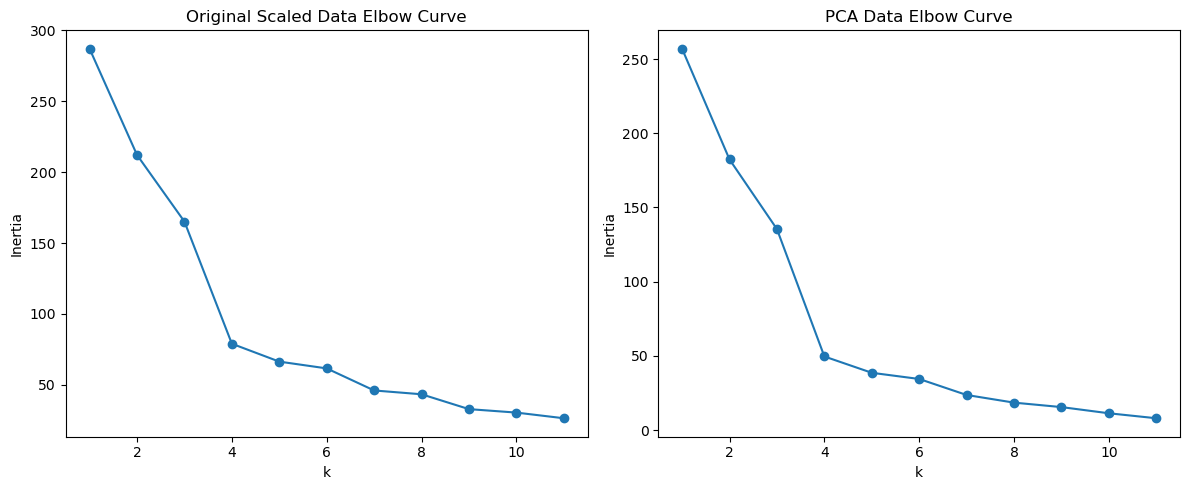

In [48]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Original Scaled Data Elbow Curve')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Inertia')

ax[1].plot(k_values, pca_inertia, marker='o')
ax[1].set_title('PCA Data Elbow Curve')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Inertia')

plt.tight_layout()
plt.show()

In [51]:
# Composite plot to contrast the clusters
scaled_plot = scaled_clustered_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols=["coin_id"],
    title="Clusters using Original Scaled Data"
)

pca_plot = pca_clustered_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="cluster",
    hover_cols=["coin_id"],
    title="Clusters using PCA Data"
)

scaled_plot + pca_plot

:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PCA1]   (PCA2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** After visually analyzing the cluster analysis results, the impact of using fewer features—through PCA dimensionality reduction—is that the clusters become more distinct and easier to interpret. By reducing the dataset to just the principal components (which retain the most important variance in the data), K-Means clustering can more effectively group similar cryptocurrencies together while eliminating noise from less informative features.

In contrast, clustering on the original scaled data with many features may result in less separated or overlapping clusters, as irrelevant or redundant features can dilute the patterns. Therefore, using fewer, well-chosen features (like PCA components) often leads to cleaner and more meaningful clusters, improving both the performance and interpretability of K-Means